In [76]:
import pandas as pd
import glob
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [77]:
# I load 101 pages for testing
list_of_files=glob.glob('../../forcluster/*.txt')
#each page is cleaned to be a huge string, by lnyx in bash. Put all the strings in a list
allwords=[]
for i in range(len(list_of_files)):
    file=open(list_of_files[i],'r')
    raw=file.read().strip('\n')
    allwords.append(raw)


In [79]:
#an example of the words from a page
print("Total number of files is {}".format(len(allwords)))
print("One example is")
print(allwords[6])

Total number of files is 101
One example is
 dell o sign in click to chat or call us shop support community search financing live chat or call available contracts coupons join dell advantage rewards price match for work servers storage networking ajax loader gif servers storage and networking intel xeon tm poweredge server deals servers storage network hardware and devices dell software data center infrastructure client systems management other ways to shop server deals small business solutions find a dell certified partner parts for your dell servers parts for your dell storage parts for your dell network switches dell nic selector dell processor selector hour sale tremendous savings up to off are going fast shop now continual shop now shop now learn more chat need help deciding which solution is right for your business chat with our solutions advisor take the first step take the first step a dell expert will call you about your server needs request a call back shop enterprise product

In [80]:
#load the stop words, and add word 'dell' to the list, show what is in the stop words.
stops=stopwords.words("english")
stops.append('dell')
stops

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

In [81]:
#load the bag_of_words method from sklearn, set the features to be 200, and get the word features 
#by calling the fit_transform method
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer='word',stop_words=stops, max_features= 200)
words_features = vectorizer.fit_transform(allwords)

In [82]:
#show the dimension of the words features, a 2D array, each row coresponds to each page.
# columns are the most popular words frequency 
words_features=words_features.toarray()
words_features.shape

(101, 200)

In [83]:
#show the feature words and their counts
key_words = vectorizer.get_feature_names()
words_count=np.sum(words_features,axis=0)

for tag, count in zip(key_words,words_count):
    print(tag, count)

ab 201
abcdefghijqrstuvwxyzabcdefghijqrstuvwxyz 116
ac 103
access 91
account 88
ads 122
advantage 289
amd 84
apply 125
atom 174
au 97
available 172
ba 175
back 149
balance 120
bit 113
business 645
call 147
celeron 186
center 102
chat 219
choose 173
chromebook 105
cm 182
com 90
community 202
compare 100
contact 95
core 540
corporation 93
credit 225
cs 122
customer 92
customers 95
da 110
data 182
days 171
dbc 112
de 391
deals 125
design 115
desktop 336
desktops 176
di 104
display 114
drive 244
du 94
dual 133
dvd 94
education 91
emails 122
en 150
endobj 653
endstream 495
enterprise 95
et 190
eur 298
factor 93
fc 94
features 113
featuring 122
financing 107
form 217
full 108
fx 115
gb 380
gen 142
get 128
gif 95
go 159
graphics 87
ha 150
hard 157
hd 142
help 204
high 85
home 115
ihelp 98
information 106
inside 773
inspiron 448
intel 1400
itanium 167
jp 90
ku 123
la 88
laptop 235
laptops 185
latitude 519
le 107
learn 271
legal 125
les 157
logo 158
management 193
memory 126
micro 121
mo 87
mob

In [84]:
#initialize the kmeans clustering methods, and cluster the words_features to 5 classes 
kmeans_clustering=KMeans(n_clusters=5,n_jobs=-1, random_state=14)
prediction_cluster=kmeans_clustering.fit_predict(words_features)

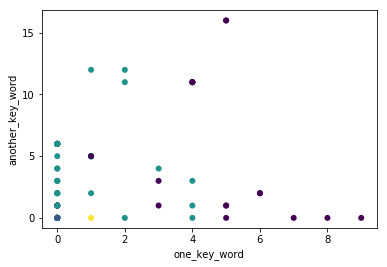

In [85]:
#2-D plot of the word-features with the predicted classes. 
#beacause of it is a 200 dimension data projecting to 2-dimension, maybe that is why
#we cannot see seperated classes
plt.scatter(words_features[:,key_words.index('features')],
            words_features[:,key_words.index('learn')], c=prediction_cluster)
plt.xlabel('one_key_word')
plt.ylabel('another_key_word')

plt.show()